In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = (20,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 20}
plt.rc('font', **font)

In [8]:
valid = pd.read_csv('./important_csvs/predictions_confidences_csvs/resnet3d-16frames.csv')

In [9]:
valid

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf,exp_pred,bur_pred,fj_pred,ande_pred,fs_pred
0,0.0,1.0,0.0,0.0,0.0,bur,0.161617,0.839542,0.143174,0.057854,0.031431,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,fj,0.956148,0.043704,0.874554,0.159228,0.044267,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,fj,0.943624,0.056539,0.947541,0.065553,0.044336,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,anode,0.951940,0.048576,0.081831,0.768656,0.033381,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,bur,0.223271,0.778087,0.083378,0.129049,0.055210,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.0,1.0,0.0,0.0,fj,0.954246,0.045699,0.968744,0.058095,0.034090,1.0,0.0,1.0,0.0,0.0
816,1.0,0.0,0.0,1.0,0.0,anode,0.938070,0.062037,0.097686,0.839202,0.053377,1.0,0.0,0.0,1.0,0.0
817,1.0,0.0,1.0,0.0,0.0,fj,0.950029,0.049207,0.768348,0.226370,0.040396,1.0,0.0,1.0,0.0,0.0
818,1.0,0.0,0.0,0.0,1.0,fs,0.946177,0.054229,0.063404,0.099354,0.844652,1.0,0.0,0.0,0.0,1.0


In [10]:
test = pd.read_csv('./important_csvs/predictions_confidences_csvs/resnet3d-test-label-conf.csv')

In [11]:
test

,exp,bur,fj,ande,fs,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf
0,1.0,0.0,1.0,0.0,0.0,0.934425,0.065214,0.898447,0.094059,0.045283
1,1.0,0.0,0.0,0.0,1.0,0.946287,0.053983,0.065268,0.085952,0.843224
2,1.0,0.0,0.0,0.0,1.0,0.950508,0.049648,0.071877,0.086879,0.865746
3,1.0,0.0,0.0,0.0,1.0,0.938401,0.062477,0.053850,0.088353,0.869492
4,1.0,0.0,0.0,0.0,1.0,0.937884,0.062631,0.063951,0.088391,0.849877
...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.0,0.0,0.0,0.0,0.815769,0.185892,0.435183,0.220276,0.044843
816,1.0,0.0,1.0,0.0,0.0,0.947155,0.052938,0.970571,0.043979,0.042342
817,1.0,0.0,0.0,0.0,0.0,0.963034,0.036796,0.118962,0.421849,0.045534
818,1.0,0.0,1.0,0.0,0.0,0.933662,0.066246,0.781572,0.169742,0.046603


In [12]:
from calibration_module.utils import compute_calibration_summary

In [14]:
valid.exp

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
815    1.0
816    1.0
817    1.0
818    1.0
819    1.0
Name: exp, Length: 820, dtype: float64

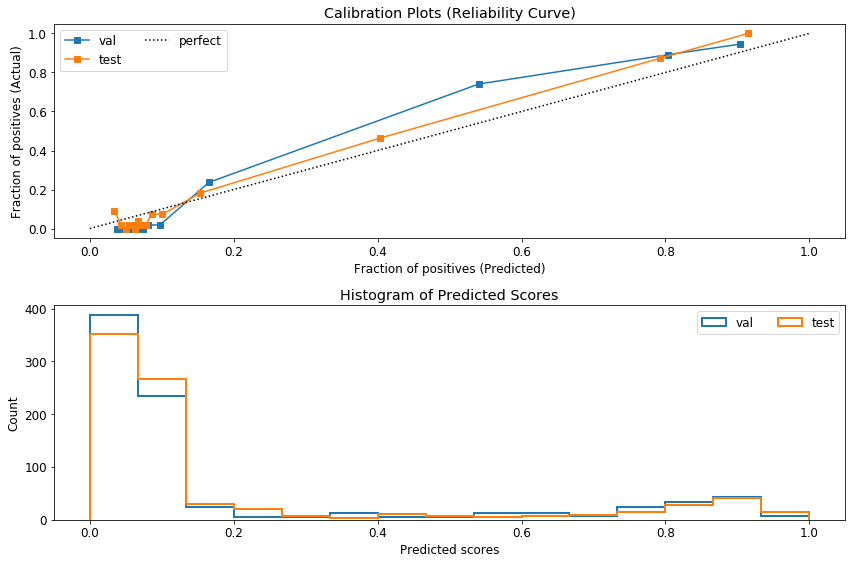

,auc,precision,recall,f1,log_loss,brier,calibration_error,name
0,0.9841,0.8910,0.8854,0.8882,0.1702,0.0418,0.0824,val
1,0.9243,0.8129,0.7975,0.8051,0.2228,0.0584,0.0532,test


In [21]:
# link the label and probability into a dataframe
label_col = 'bur'

score_col = 'bur_conf'
df_eval_val = valid[['bur','bur_conf']]

df_eval_test = test[['bur','bur_conf']]

# key to the dictionary is for giving the result
# a descriptive name
eval_dict = {
    'val': df_eval_val,
    'test': df_eval_test
}

# change default style figure and font size
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 12

n_bins = 15
df_result = compute_calibration_summary(eval_dict, label_col, score_col, n_bins=n_bins)
df_result

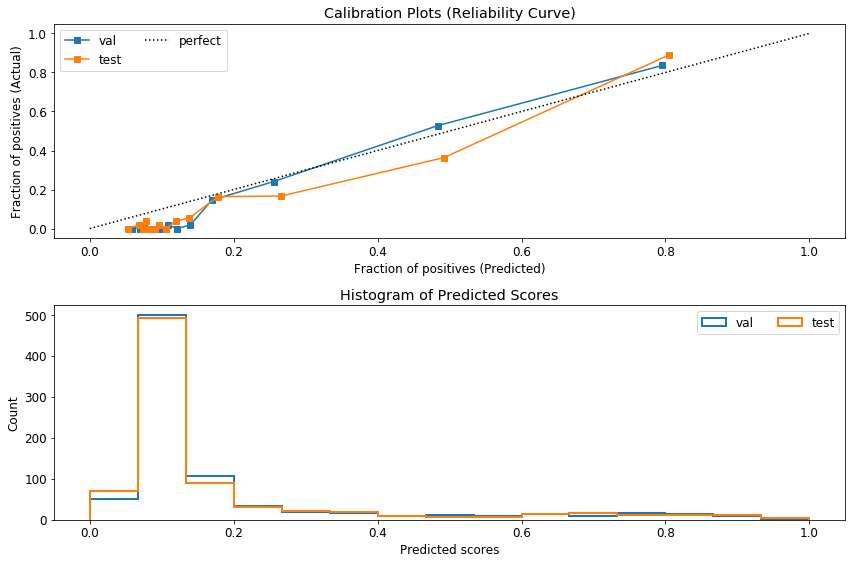

,auc,precision,recall,f1,log_loss,brier,calibration_error,name
0,0.9592,0.6746,0.8586,0.7556,0.2101,0.0520,0.0791,val
1,0.9322,0.8289,0.6562,0.7326,0.2162,0.0539,0.0836,test


In [22]:
# link the label and probability into a dataframe
label_col = 'ande'

score_col = 'ande_conf'
df_eval_val = valid[['ande','ande_conf']]

df_eval_test = test[['ande','ande_conf']]

# key to the dictionary is for giving the result
# a descriptive name
eval_dict = {
    'val': df_eval_val,
    'test': df_eval_test
}

# change default style figure and font size
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 12

n_bins = 15
df_result = compute_calibration_summary(eval_dict, label_col, score_col, n_bins=n_bins)
df_result

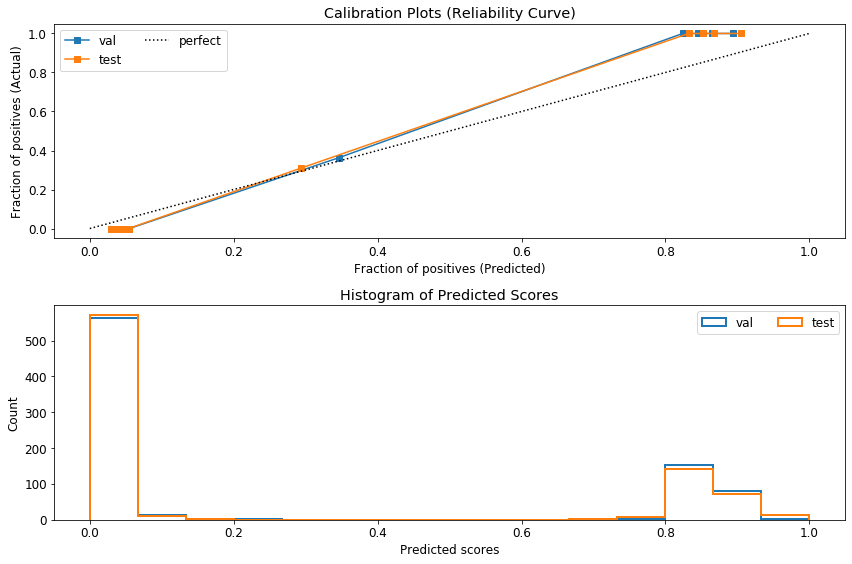

,auc,precision,recall,f1,log_loss,brier,calibration_error,name
0,1.0,1.0,1.0,1.0,0.0789,0.0082,0.0826,val
1,1.0,1.0,1.0,1.0,0.0757,0.0076,0.0793,test


In [23]:
# link the label and probability into a dataframe
label_col = 'fs'

score_col = 'fs_conf'
df_eval_val = valid[['fs','fs_conf']]

df_eval_test = test[['fs','fs_conf']]

# key to the dictionary is for giving the result
# a descriptive name
eval_dict = {
    'val': df_eval_val,
    'test': df_eval_test
}

# change default style figure and font size
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 12

n_bins = 15
df_result = compute_calibration_summary(eval_dict, label_col, score_col, n_bins=n_bins)
df_result

In [38]:
from sklearn.calibration import IsotonicRegression
from calibration_module.calibrator import (
    HistogramCalibrator,
    PlattCalibrator,
    PlattHistogramCalibrator
)

In [39]:
isotonic = IsotonicRegression(out_of_bounds='clip',
                              y_min=valid.ande_conf.min(),
                              y_max=valid.ande_conf.max())
isotonic.fit(valid.ande_conf, valid.ande)
isotonic_probs = isotonic.predict(test.ande_conf)
isotonic_probs

array([0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 ,
       0.0367784 , 0.70833333, 0.11267606, 0.0367784 , 0.0367784 ,
       0.0367784 , 0.0367784 , 0.0367784 , 0.16666667, 0.11267606,
       0.16666667, 0.0367784 , 0.11267606, 0.0367784 , 0.0367784 ,
       0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 ,
       0.0367784 , 0.70833333, 0.0367784 , 0.11267606, 0.0367784 ,
       0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 ,
       0.75      , 0.0367784 , 0.0367784 , 0.70833333, 0.0367784 ,
       0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 , 0.0367784 ,
       0.0367784 , 0.75      , 0.4       , 0.0367784 , 0.0367784 ,
       0.11267606, 0.4       , 0.0367784 , 0.0367784 , 0.0367784 ,
       0.4       , 0.4       , 0.9616304 , 0.0367784 , 0.0367784 ,
       0.0367784 , 0.0367784 , 0.83333333, 0.0367784 , 0.11267606,
       0.0367784 , 0.0367784 , 0.0367784 , 0.70833333, 0.0367784 ,
       0.0367784 , 0.0367784 , 0.11267606, 0.0367784 , 0.03677

In [42]:
histogram = HistogramCalibrator(n_bins=n_bins)
histogram.fit(valid.ande_conf.values, valid.ande.values)
histogram_probs = histogram.predict(test.ande_conf)
histogram_probs

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.85185185, 0.14814815, 0.        , 0.        ,
       0.        , 0.01851852, 0.01818182, 0.25925926, 0.14814815,
       0.25925926, 0.        , 0.14814815, 0.01851852, 0.        ,
       0.        , 0.        , 0.        , 0.01818182, 0.        ,
       0.        , 0.51851852, 0.        , 0.14814815, 0.        ,
       0.01818182, 0.        , 0.01818182, 0.        , 0.        ,
       0.85185185, 0.        , 0.01818182, 0.51851852, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.85185185, 0.51851852, 0.        , 0.        ,
       0.14814815, 0.25925926, 0.        , 0.        , 0.        ,
       0.25925926, 0.25925926, 0.85185185, 0.        , 0.        ,
       0.        , 0.01818182, 0.85185185, 0.        , 0.14814815,
       0.        , 0.        , 0.        , 0.85185185, 0.        ,
       0.        , 0.        , 0.14814815, 0.01851852, 0.     

In [43]:
platt = PlattCalibrator(log_odds=True)
platt.fit(valid.ande_conf.values, valid.ande.values)
platt_probs = platt.predict(test.ande_conf)
platt_probs.values

array([0.01636506, 0.01363813, 0.01393638, 0.01441772, 0.01443048,
       0.00624113, 0.82162883, 0.0558133 , 0.01349278, 0.01791044,
       0.01108071, 0.03611677, 0.0214115 , 0.11566952, 0.04980812,
       0.16057178, 0.01467338, 0.07710451, 0.03419905, 0.01486483,
       0.00649924, 0.0123113 , 0.01925444, 0.02045744, 0.00595423,
       0.01483577, 0.73362451, 0.02870548, 0.0465851 , 0.02566412,
       0.02201249, 0.01549479, 0.00983763, 0.01394171, 0.02805097,
       0.90346729, 0.01203767, 0.01067749, 0.70266238, 0.00924187,
       0.0124478 , 0.00256789, 0.00873105, 0.03263476, 0.01710291,
       0.01115523, 0.87593389, 0.31371443, 0.00529637, 0.008744  ,
       0.0493971 , 0.22434941, 0.00871738, 0.03246242, 0.01099366,
       0.20225773, 0.2035916 , 0.99347352, 0.00802826, 0.01660955,
       0.0122709 , 0.02359227, 0.92100941, 0.01653292, 0.06305318,
       0.0090035 , 0.01187706, 0.01495644, 0.82592072, 0.01745988,
       0.01889819, 0.01382096, 0.06218281, 0.03581811, 0.01338

In [44]:
platt_histogram = PlattHistogramCalibrator(n_bins=n_bins, log_odds=True)
platt_histogram.fit(valid.ande_conf.values, valid.ande.values)
platt_histogram_probs = platt_histogram.predict(test.ande_conf)
platt_histogram_probs

array([0.01620628, 0.01303424, 0.01437541, 0.01437541, 0.01437541,
       0.00654142, 0.92485826, 0.05760307, 0.01303424, 0.01847916,
       0.01143539, 0.03768466, 0.02249624, 0.14518844, 0.05760307,
       0.14518844, 0.01437541, 0.05760307, 0.03768466, 0.01437541,
       0.00654142, 0.01303424, 0.01847916, 0.02249624, 0.00654142,
       0.01437541, 0.51521079, 0.02830582, 0.05760307, 0.02830582,
       0.02249624, 0.01620628, 0.01013787, 0.01437541, 0.02830582,
       0.92485826, 0.01143539, 0.01013787, 0.51521079, 0.0089994 ,
       0.01303424, 0.00654142, 0.0089994 , 0.02830582, 0.01620628,
       0.01143539, 0.92485826, 0.51521079, 0.00654142, 0.0089994 ,
       0.05760307, 0.14518844, 0.0089994 , 0.02830582, 0.01143539,
       0.14518844, 0.14518844, 0.92485826, 0.00654142, 0.01620628,
       0.01303424, 0.02249624, 0.92485826, 0.01620628, 0.05760307,
       0.0089994 , 0.01143539, 0.01437541, 0.92485826, 0.01847916,
       0.01847916, 0.01437541, 0.05760307, 0.03768466, 0.01303

## Calibration Model Evaluation

In this section, we compare the calibration error of various calibration models.

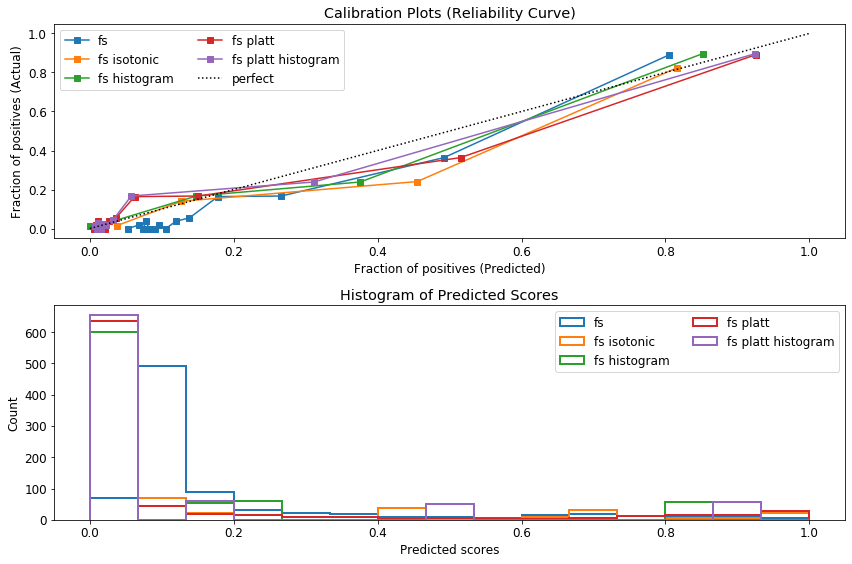

,auc,precision,recall,f1,log_loss,brier,calibration_error,name
3,0.9322,0.8289,0.6562,0.7326,0.1756,0.0490,0.0509,fs platt
4,0.9267,0.6449,0.7188,0.6798,0.1863,0.0518,0.0514,fs platt histogram
2,0.9194,0.6449,0.7188,0.6798,0.3999,0.0523,0.0528,fs histogram
1,0.9214,0.8182,0.6562,0.7283,0.1871,0.0512,0.0570,fs isotonic
0,0.9322,0.8289,0.6562,0.7326,0.2162,0.0539,0.0836,fs


In [46]:
score_col = 'ande_conf'
label_col = 'ande'

df_xgb_eval_test = pd.DataFrame({
    label_col: test.ande.values,
    score_col: test.ande_conf.values
})
df_xgb_isotonic_eval_test = pd.DataFrame({
    label_col: test.ande.values,
    score_col: isotonic_probs + 1e-3
})
df_xgb_platt_eval_test = pd.DataFrame({
    label_col: test.ande.values,
    score_col: platt_probs.values
})
df_xgb_platt_histogram_eval_test = pd.DataFrame({
    label_col: test.ande.values,
    score_col: platt_histogram_probs
})
df_xgb_histogram_eval_test = pd.DataFrame({
    label_col: test.ande.values,
    score_col: histogram_probs
})


eval_dict = {
    'fs': df_xgb_eval_test,
    'fs isotonic': df_xgb_isotonic_eval_test,
    'fs histogram': df_xgb_histogram_eval_test,
    'fs platt': df_xgb_platt_eval_test,
    'fs platt histogram': df_xgb_platt_histogram_eval_test
}

df_result = compute_calibration_summary(eval_dict, label_col, score_col, n_bins=n_bins)
df_result.sort_values('calibration_error')

We also test out the calibration error by Platt Scaling related methods without the log odds transformation. It turns out, in this example, missing the log odds transformation step undermines the performance by a significant amount.

In [17]:
platt = PlattCalibrator(log_odds=False)
platt.fit(xgb_pred_val, labels_val)
platt_probs = platt.predict(xgb_pred_test)
platt_probs

array([0.1854087 , 0.14956946, 0.08383791, ..., 0.12562479, 0.11153563,
       0.3220031 ])

In [18]:
platt_histogram = PlattHistogramCalibrator(n_bins=n_bins, log_odds=False)
platt_histogram.fit(xgb_pred_val, labels_val)
platt_histogram_probs = platt_histogram.predict(xgb_pred_test)
platt_histogram_probs

array([0.18644158, 0.14676159, 0.08514048, ..., 0.12617081, 0.11050533,
       0.33625734])